In [1]:
import cv2
import numpy as np
from basisklassen_cam import Camera
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'basisklassen_cam'

In [27]:
cam = Camera(colorspace="rgb")

In [28]:
img = cam.get_frame()

In [29]:
img.shape

(480, 640, 3)

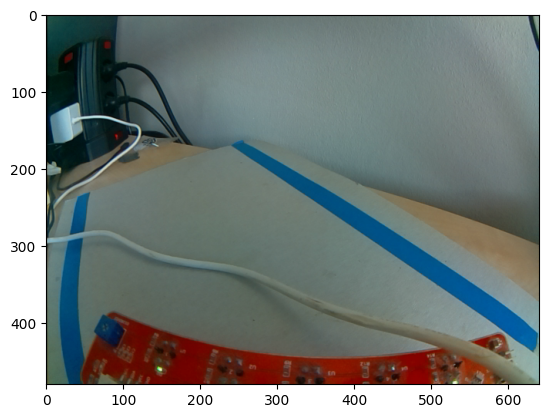

In [30]:
plt.imshow(img)

In [31]:
img_small = cv2.resize(img, None, fx=0.25, fy=0.25)

In [32]:
img_small.shape

(120, 160, 3)

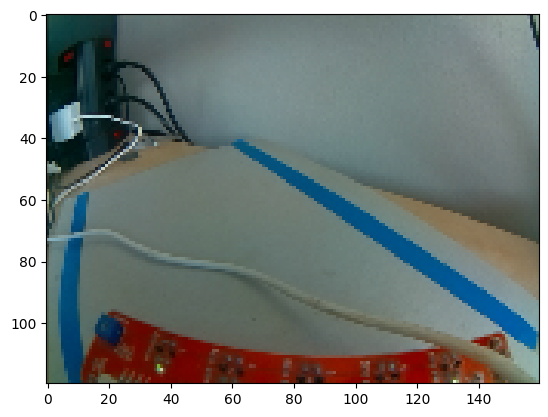

In [33]:
plt.imshow(img_small)

In [34]:
img_cropped = img_small[50:90, :, :]

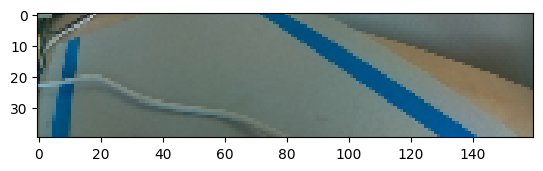

In [35]:
plt.imshow(img_cropped)

In [36]:
img_hsv = cv2.cvtColor(img_cropped, cv2.COLOR_RGB2HSV)

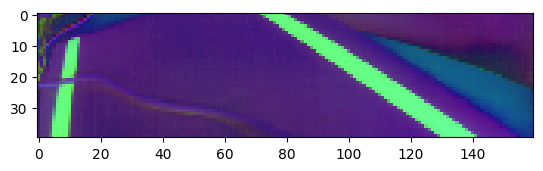

In [37]:
plt.imshow(img_hsv)

In [38]:
img_hsv

array([[[ 62,  26, 129],
        [ 90,  44, 146],
        [ 79,  37, 152],
        ...,
        [ 82,  25, 111],
        [ 82,  25, 110],
        [ 81,  33, 107]],

       [[ 78,  35, 124],
        [ 87,  52, 138],
        [ 80,  44, 132],
        ...,
        [ 85,  25, 110],
        [ 81,  30, 110],
        [ 86,  33, 108]],

       [[ 47,  60,  60],
        [ 84,  99,  62],
        [ 81, 138,  37],
        ...,
        [ 85,  30, 110],
        [ 84,  32, 111],
        [ 83,  37, 110]],

       ...,

       [[ 71,  38, 113],
        [ 86,  54, 127],
        [ 87,  55, 125],
        ...,
        [ 21,  64, 143],
        [ 20,  61, 141],
        [ 23,  60, 135]],

       [[ 64,  34, 111],
        [ 83,  52, 127],
        [ 85,  53, 125],
        ...,
        [ 22,  59, 142],
        [ 22,  59, 139],
        [ 23,  61, 139]],

       [[ 67,  39, 111],
        [ 86,  58, 124],
        [ 88,  56, 122],
        ...,
        [ 22,  50, 139],
        [ 23,  51, 140],
        [ 25,  51, 139]]

In [39]:
lower_blue = np.array([90, 60, 60])
upper_blue = np.array([130, 255, 255])

In [40]:
img_filtered = cv2.inRange(img_hsv, lower_blue, upper_blue)

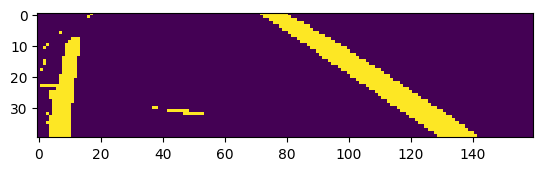

In [41]:
plt.imshow(img_filtered)

In [42]:
img_median_blur = cv2.medianBlur(img_filtered, 7)

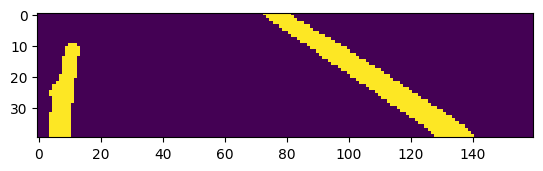

In [43]:
plt.imshow(img_median_blur)

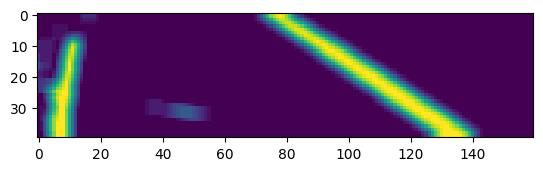

In [44]:
img_blur = cv2.blur(img_filtered, (5, 5))
plt.imshow(img_blur)

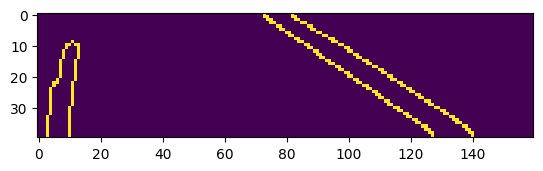

In [45]:
img_edges = cv2.Canny(img_median_blur, 900, 1000)
plt.imshow(img_edges)

In [46]:
lines = cv2.HoughLinesP(img_median_blur, 1, np.pi/180, threshold=20, minLineLength=20, maxLineGap=5)

In [47]:
print(len(lines))


11


In [48]:
line_img = img_cropped.copy()

if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(line_img, (x1, y1), (x2, y2), (255, 0, 0), 1)

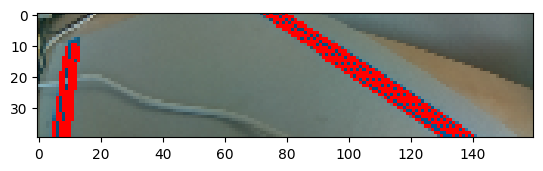

In [49]:
plt.imshow(line_img)

In [50]:
cam.release()

Zu beachten:

- Nur eine Linie sichtbar
- Ursprung Links oben -> ändert die Steigung
- WarpPerspective
- putText 